In [191]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [192]:
# import dataset
df=pd.read_csv("datasets/adult.csv")
df.head()

,age,workclass,fnlwgt,education,educational-num,marital-status,occupation,relationship,race,gender,capital-gain,capital-loss,hours-per-week,native-country,income
0,25,Private,226802,11th,7,Never-married,Machine-op-inspct,Own-child,Black,Male,0,0,40,United-States,<=50K
1,38,Private,89814,HS-grad,9,Married-civ-spouse,Farming-fishing,Husband,White,Male,0,0,50,United-States,<=50K
2,28,Local-gov,336951,Assoc-acdm,12,Married-civ-spouse,Protective-serv,Husband,White,Male,0,0,40,United-States,>50K
3,44,Private,160323,Some-college,10,Married-civ-spouse,Machine-op-inspct,Husband,Black,Male,7688,0,40,United-States,>50K
4,18,?,103497,Some-college,10,Never-married,?,Own-child,White,Female,0,0,30,United-States,<=50K


In [193]:
df.isin(["?"])

,age,workclass,fnlwgt,education,educational-num,marital-status,occupation,relationship,race,gender,capital-gain,capital-loss,hours-per-week,native-country,income
0,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
4,False,True,False,False,False,False,True,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
48837,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
48838,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
48839,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
48840,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False


In [194]:
df.isin(['?']).sum()

age                   0
workclass          2799
fnlwgt                0
education             0
educational-num       0
marital-status        0
occupation         2809
relationship          0
race                  0
gender                0
capital-gain          0
capital-loss          0
hours-per-week        0
native-country      857
income                0
dtype: int64

In [195]:
df["workclass"]=df["workclass"].replace('?',np.nan)
df["occupation"]=df["occupation"].replace('?',np.nan)
df["native-country"]=df["native-country"].replace('?',np.nan)

In [196]:
df.shape

(48842, 15)

In [197]:
# remove nan
df.dropna(how="any",inplace=True)

In [198]:
df.shape

(45222, 15)

In [199]:
print(f"There are {df.duplicated().sum()} duplicate values")

There are 47 duplicate values


In [200]:
df=df.drop_duplicates()
df.shape

(45175, 15)

In [201]:
df.columns

Index(['age', 'workclass', 'fnlwgt', 'education', 'educational-num',
       'marital-status', 'occupation', 'relationship', 'race', 'gender',
       'capital-gain', 'capital-loss', 'hours-per-week', 'native-country',
       'income'],
      dtype='object')

In [202]:
# drop unrelated columns
df.drop(["fnlwgt","educational-num","marital-status","relationship","race"],axis=1,inplace=True)

In [203]:
df.columns

Index(['age', 'workclass', 'education', 'occupation', 'gender', 'capital-gain',
       'capital-loss', 'hours-per-week', 'native-country', 'income'],
      dtype='object')

In [204]:
x=df.loc[:,['age', 'workclass', 'education', 'occupation', 'gender', 'capital-gain','capital-loss', 'hours-per-week', 'native-country']]
y=df.loc[:,["income"]]

In [205]:
y

,income
0,<=50K
1,<=50K
2,>50K
3,>50K
5,<=50K
...,...
48837,<=50K
48838,>50K
48839,<=50K
48840,<=50K


In [206]:
from sklearn.preprocessing import LabelEncoder
y=LabelEncoder().fit_transform(y)
y=pd.DataFrame(y)
y.head()

c:\Users\LOKESH\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\preprocessing\_label.py:114: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


,0
0,0
1,0
2,1
3,1
4,0


In [207]:
# get numerical and categorical featues
nf=x.select_dtypes("number")
cf=x.select_dtypes("object")
cf

,workclass,education,occupation,gender,native-country
0,Private,11th,Machine-op-inspct,Male,United-States
1,Private,HS-grad,Farming-fishing,Male,United-States
2,Local-gov,Assoc-acdm,Protective-serv,Male,United-States
3,Private,Some-college,Machine-op-inspct,Male,United-States
5,Private,10th,Other-service,Male,United-States
...,...,...,...,...,...
48837,Private,Assoc-acdm,Tech-support,Female,United-States
48838,Private,HS-grad,Machine-op-inspct,Male,United-States
48839,Private,HS-grad,Adm-clerical,Female,United-States
48840,Private,HS-grad,Adm-clerical,Male,United-States


In [208]:
conv_categorical_features=pd.get_dummies(cf)

In [209]:
conv_categorical_features.shape

(45175, 80)

In [210]:
conv_categorical_features

,workclass_Federal-gov,workclass_Local-gov,workclass_Private,workclass_Self-emp-inc,workclass_Self-emp-not-inc,workclass_State-gov,workclass_Without-pay,education_10th,education_11th,education_12th,...,native-country_Portugal,native-country_Puerto-Rico,native-country_Scotland,native-country_South,native-country_Taiwan,native-country_Thailand,native-country_Trinadad&Tobago,native-country_United-States,native-country_Vietnam,native-country_Yugoslavia
0,0,0,1,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,1,0,0
1,0,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
2,0,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
3,0,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
5,0,0,1,0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
48837,0,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
48838,0,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
48839,0,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
48840,0,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0


In [211]:
all_features=[conv_categorical_features,nf]
newX=pd.concat(all_features,axis=1,join="inner")

In [212]:
# train and split
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(newX,y,test_size=0.33,random_state=42)

In [213]:
from sklearn.tree import DecisionTreeClassifier
clf=DecisionTreeClassifier(max_depth=5)
clf.fit(x_train,y_train)

DecisionTreeClassifier(max_depth=5)

In [214]:
y_pred=clf.predict(x_test)

In [215]:
from sklearn.metrics import accuracy_score
print(accuracy_score(y_pred, y_test))

0.8195599678025222


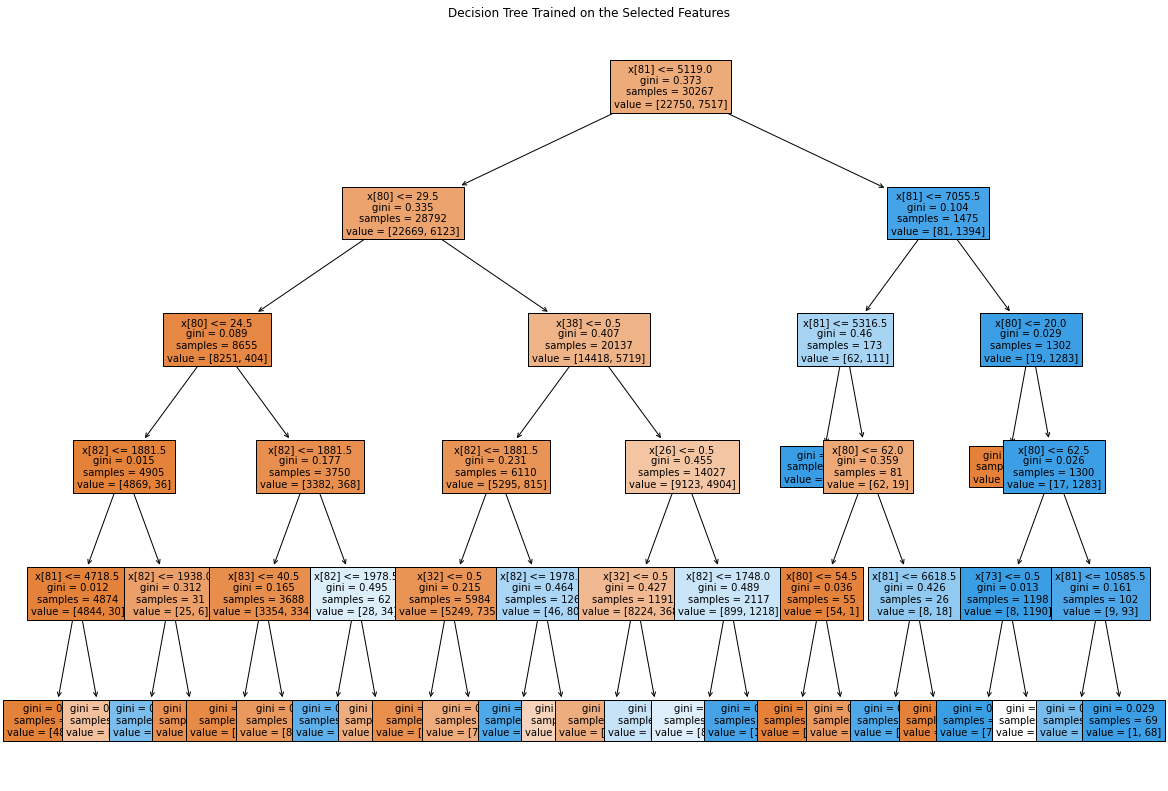

In [216]:
from sklearn.tree import plot_tree
import matplotlib.pyplot as plt
plt.figure(figsize=(20,14))
plot_tree(clf,fontsize=10,filled=True)
plt.title("Decision Tree Trained on the Selected Features")
plt.show()